# Context
 


In [41]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

sns.set_style('whitegrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (20, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [159]:
data = pd.read_csv('train.csv', index_col='PassengerId')

In [160]:
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
0,1,1,"Oconnor, Frankie",male,NaN,2,0,209245,27.14,C12239,S
1,0,3,"Bryan, Drew",male,NaN,0,0,27323,13.35,NaN,S
2,0,3,"Owens, Kenneth",male,0.33,1,2,CA 457703,71.29,NaN,S
3,0,3,"Kramer, James",male,19.00,0,0,A. 10866,13.04,NaN,S
4,1,3,"Bond, Michael",male,25.00,0,0,427635,7.76,NaN,S


In [161]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 0 to 99999
Data columns (total 11 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   Survived  100000 non-null  int64  
 1   Pclass    100000 non-null  int64  
 2   Name      100000 non-null  object 
 3   Sex       100000 non-null  object 
 4   Age       96708 non-null   float64
 5   SibSp     100000 non-null  int64  
 6   Parch     100000 non-null  int64  
 7   Ticket    95377 non-null   object 
 8   Fare      99866 non-null   float64
 9   Cabin     32134 non-null   object 
 10  Embarked  99750 non-null   object 
dtypes: float64(2), int64(4), object(5)
memory usage: 9.2+ MB


# Data quality assessment

In [162]:
#Удаление колонок не несущих полезную информацию(или мало информации)
useless_columns = ['Name', 'Cabin', 'Ticket']
data_clean = data.drop(columns = useless_columns)

data_clean.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
0,1,1,male,NaN,2,0,27.14,S
1,0,3,male,NaN,0,0,13.35,S
2,0,3,male,0.33,1,2,71.29,S
3,0,3,male,19.00,0,0,13.04,S
4,1,3,male,25.00,0,0,7.76,S


- спаслось ~ 43% всех пассажиров
- средний возраст людей на корабле - 38 лет
- максимальное количество братьев/сестер на корабле - 8
- максимальное количество родителей/детей на корабле - 9
- видна очень большая разница между ценой билета: минимальная - 0.68, максимальная - 744


In [163]:
#заполняем пустые ячейки

def fill_na(df):
        
    df_copy = df.copy()
    
    categorial_vars = list(df_copy.select_dtypes(include = ['object']).columns.values)
    numerical_vars = list(df_copy.select_dtypes(include = ['int64', 'float64']).columns.values)
    
    for col in categorial_vars:
        if (df_copy[col].isnull().values.any()):
            df_copy[col].fillna(df_copy[col].mode()[0], inplace=True)
                
    for col in numerical_vars:
        if (df_copy[col].isnull().values.any()):
            df_copy[col].fillna(df_copy[col].median(), inplace=True)        
            
    return df_copy

In [164]:
data_filled = fill_na(data_clean)

In [165]:
data_filled.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
0,1,1,male,39.00,2,0,27.14,S
1,0,3,male,39.00,0,0,13.35,S
2,0,3,male,0.33,1,2,71.29,S
3,0,3,male,19.00,0,0,13.04,S
4,1,3,male,25.00,0,0,7.76,S


In [166]:
data_filled.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 0 to 99999
Data columns (total 8 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   Survived  100000 non-null  int64  
 1   Pclass    100000 non-null  int64  
 2   Sex       100000 non-null  object 
 3   Age       100000 non-null  float64
 4   SibSp     100000 non-null  int64  
 5   Parch     100000 non-null  int64  
 6   Fare      100000 non-null  float64
 7   Embarked  100000 non-null  object 
dtypes: float64(2), int64(4), object(2)
memory usage: 6.9+ MB


# Data exploration
 

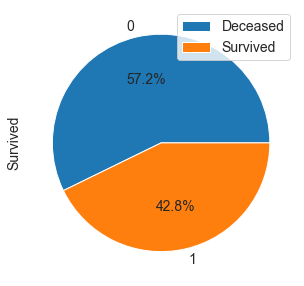

In [168]:
data_filled['Survived'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.legend(labels =['Deceased', 'Survived'])

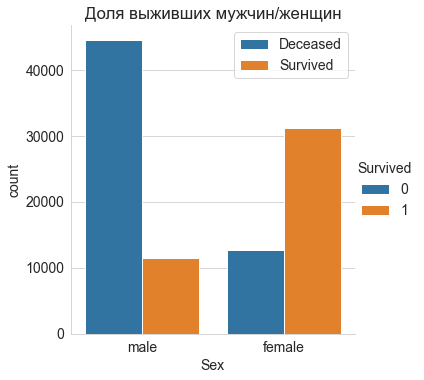

In [169]:
sns.catplot(x='Sex',data= data_filled, hue='Survived', kind='count')
plt.title('Доля выживших мужчин/женщин')
plt.legend(labels =['Deceased', 'Survived'])

Text(0.5, 1.0, 'выжившие пассажиры по классам')

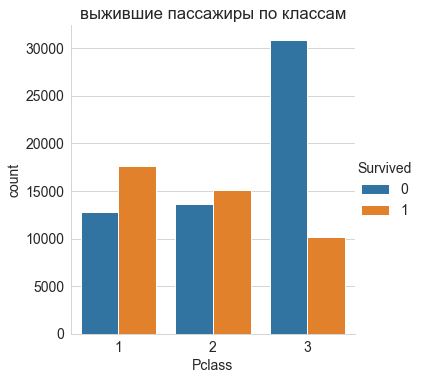

In [170]:
sns.catplot(data=data_filled, x='Pclass', hue='Survived', kind='count')
plt.title('выжившие пассажиры по классам')

Text(0.5, 1.0, 'количество пассажиров по классам')

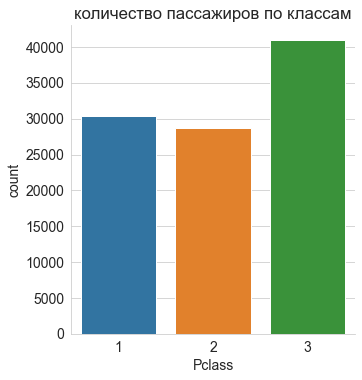

In [51]:
sns.catplot(data=data_filled, x='Pclass', kind='count')
plt.title('количество пассажиров по классам')

<AxesSubplot:xlabel='Parch', ylabel='count'>

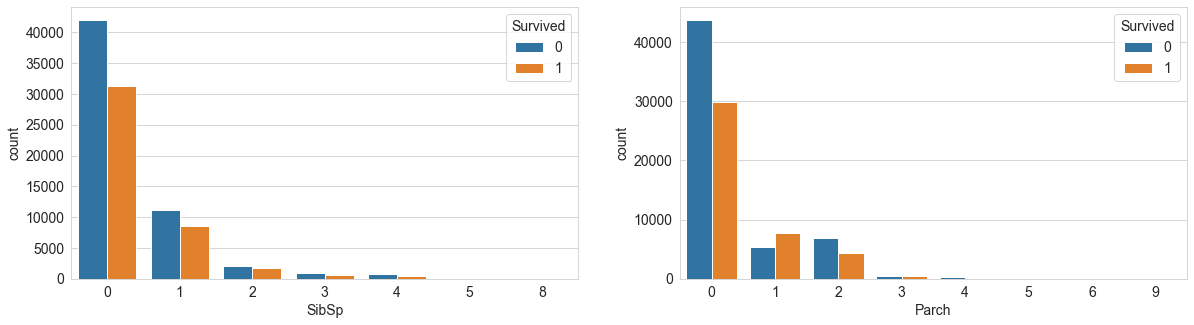

In [127]:
fig, axes = plt.subplots(1, 2)
sns.countplot(ax=axes[0],data=data_filled, x='SibSp', hue='Survived')
sns.countplot(ax=axes[1],data=data_filled, x='Parch', hue='Survived')

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Fare', ylabel='Density'>

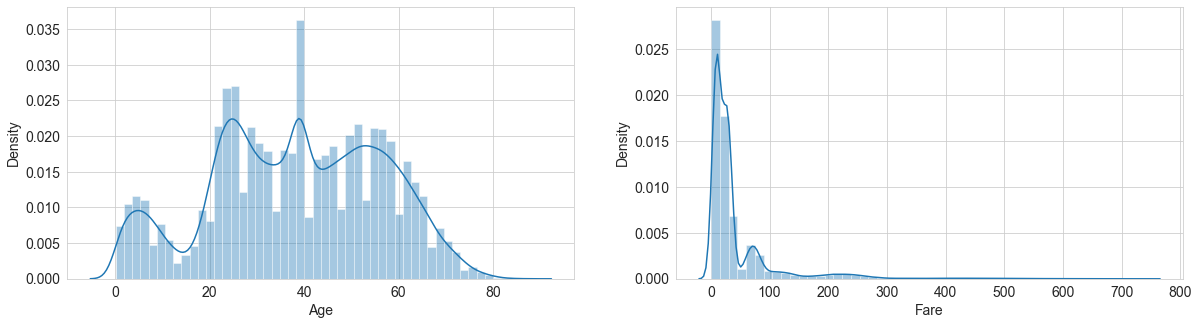

In [171]:
fig, axes = plt.subplots(1, 2)
sns.distplot(ax=axes[0], a=data_filled['Age'])
sns.distplot(ax=axes[1], a=data_filled['Fare'])

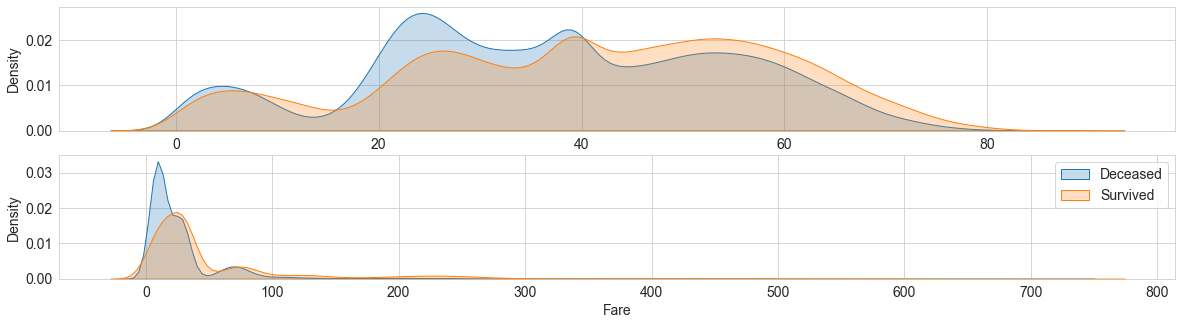

In [191]:
plt.subplot(2,1,1)
sns.kdeplot(data_filled.loc[(data_filled['Survived'] == 0),'Age'], label = 'Deceased', shade=True)
sns.kdeplot(data_filled.loc[(data_filled['Survived'] == 1), 'Age'], label = 'Survived', shade = True)
plt.subplot(2,1,2)
sns.kdeplot(data_filled.loc[(data_filled['Survived'] == 0),'Fare'], label = 'Deceased', shade=True)
sns.kdeplot(data_filled.loc[(data_filled['Survived'] == 1), 'Fare'], label = 'Survived', shade = True)

plt.legend()

In [123]:
sex = pd.get_dummies(data_filled['Sex'], drop_first=True)
embark = pd.get_dummies(data_filled['Embarked'], drop_first=True)
data_filled.drop(['Sex','Embarked'],axis=1, inplace=True)
data_filled = pd.concat([data_filled,sex,embark],axis=1)

# Summary

In [177]:
data_filled.loc[(data_filled['Survived']==0)]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
1,0,3,male,39.00,0,0,13.35,S
2,0,3,male,0.33,1,2,71.29,S
3,0,3,male,19.00,0,0,13.04,S
5,0,2,male,35.00,0,0,6.71,S
6,0,3,male,7.00,0,0,9.77,S
...,...,...,...,...,...,...,...,...
99994,0,2,male,36.00,0,0,12.14,S
99996,0,2,male,66.00,0,0,11.15,S
99997,0,3,male,37.00,0,0,9.95,S
